In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the data from the CSV file
file_path = r'C:\Users\Suliat\Documents\Dataset\Project Code\wustl-ehms-2020_with_attacks_categories.csv'
data = pd.read_csv(file_path)

In [11]:
# Display the first few rows of the dataset
print(data.head())

     Dir        Flgs     SrcAddr     DstAddr  Sport  Dport  SrcBytes  \
0     ->   e          10.0.1.172  10.0.1.150  58059   1111       496   
1     ->   e          10.0.1.172  10.0.1.150  58062   1111       496   
2     ->   e          10.0.1.172  10.0.1.150  58065   1111       496   
3     ->   e          10.0.1.172  10.0.1.150  58067   1111       496   
4     ->   e          10.0.1.172  10.0.1.150  58069   1111       496   

   DstBytes   SrcLoad  DstLoad  ...  Temp  SpO2  Pulse_Rate  SYS  DIA  \
0       186  276914.0  92305.0  ...  28.9     0           0    0    0   
1       186  230984.0  76995.0  ...  28.9     0           0    0    0   
2       186  218470.0  72823.0  ...  28.9    89         104    0    0   
3       186  203376.0  67792.0  ...  28.9    89         104    0    0   
4       186  235723.0  78574.0  ...  28.9    89         101    0    0   

   Heart_rate  Resp_Rate   ST  Attack Category  Label  
0           0          0  0.0           normal      0  
1          78   

In [12]:
# List of Biometric Data columns
biometric_columns = ['Temp', 'SpO2', 'Pulse_Rate', 'SYS', 'DIA', 'Heart_rate', 'Resp_Rate', 'ST']

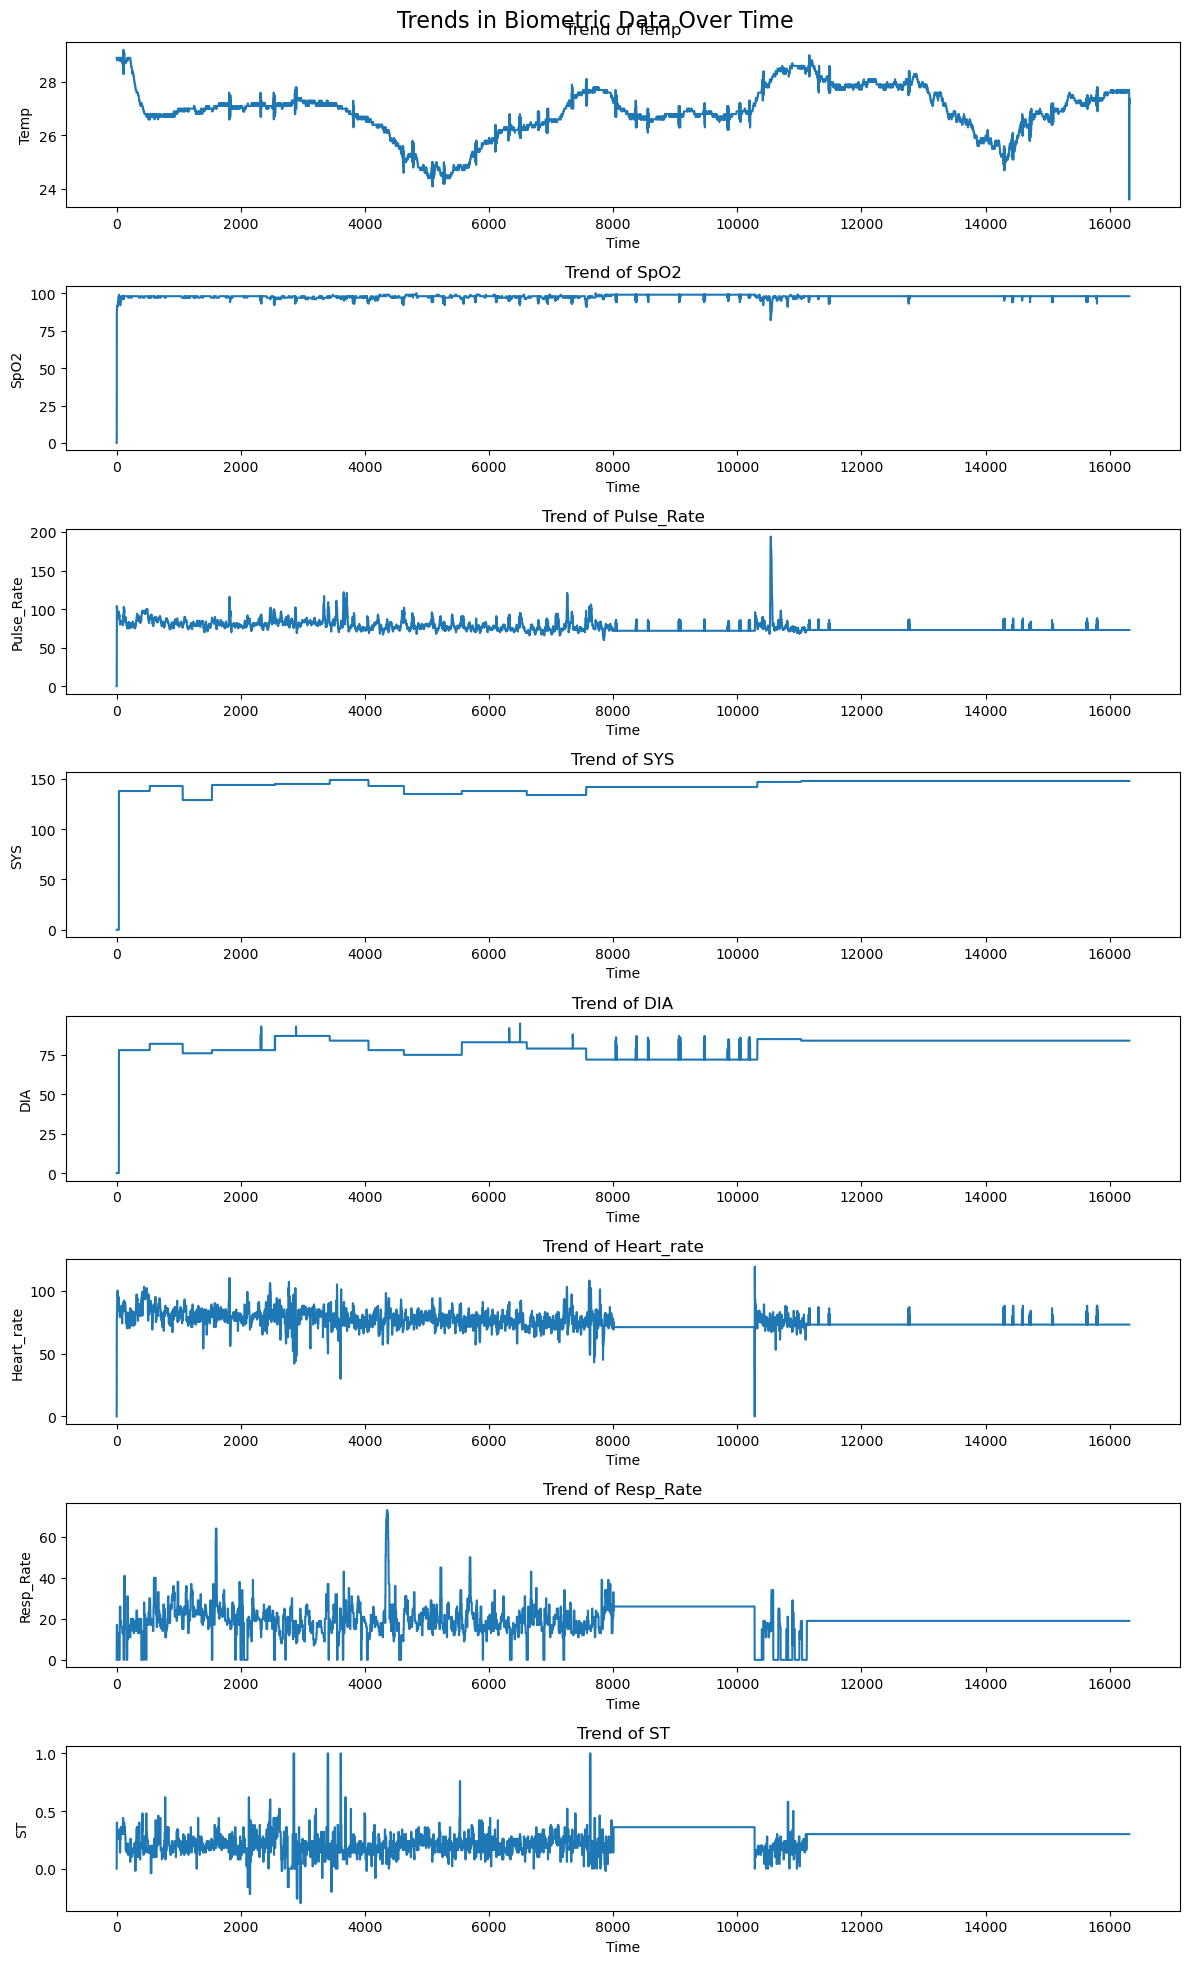

In [13]:
# Plot trends for each Biometric Data
fig, axes = plt.subplots(len(biometric_columns), 1, figsize=(12, 20))
fig.suptitle('Trends in Biometric Data Over Time', fontsize=16)

for i, col in enumerate(biometric_columns):
    data[col].plot(ax=axes[i])
    axes[i].set_title(f'Trend of {col}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()



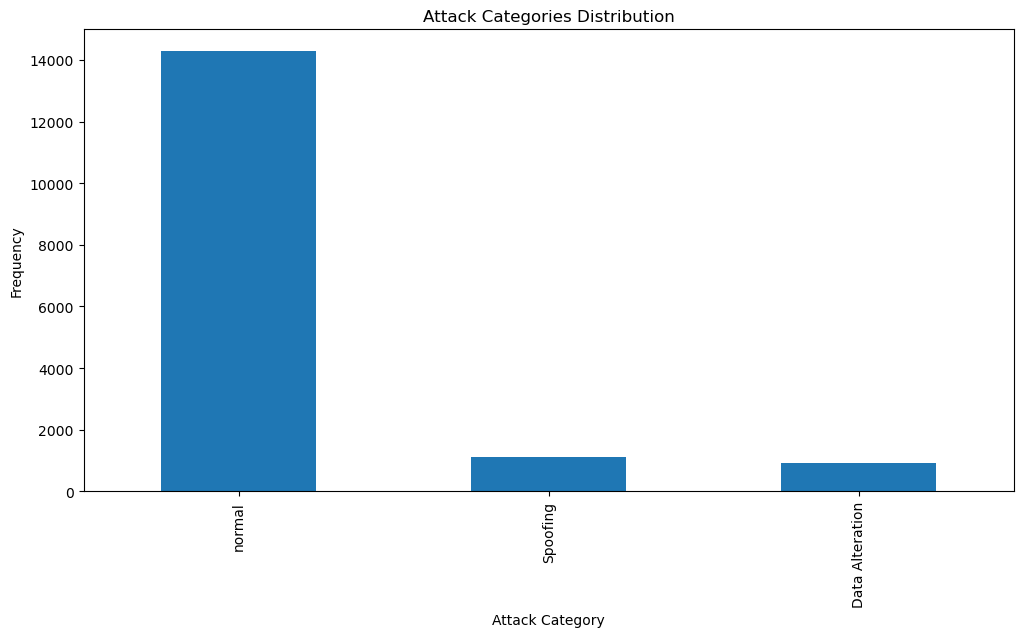

In [14]:
# Plot attack categories over time
plt.figure(figsize=(12, 6))
data['Attack Category'].value_counts().plot(kind='bar')
plt.title('Attack Categories Distribution')
plt.xlabel('Attack Category')
plt.ylabel('Frequency')
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# Import the FPDF class
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Pacemaker Devices Analysis Report', 0, 1, 'C')
        self.ln(10)

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_image(self, image_path):
        self.image(image_path, w=180)
        self.ln(10)

pdf = PDF()
pdf.add_page()


In [17]:
# Introduction
pdf.chapter_title('Introduction')
intro = """This report presents an analysis of the dataset related to peacemaker devices in patients.
The dataset includes various biometric data and attack categories.
The objective of this analysis is to identify trends in biometric data and understand the distribution of attack categories."""
pdf.chapter_body(intro)

In [18]:
# Data Summary
pdf.chapter_title('Data Summary')
data_summary = data.describe().to_string()
pdf.chapter_body(data_summary)

In [23]:
# Trends in Biometric Data
pdf.chapter_title('Trends in Biometric Data')
pdf.chapter_body("The following figures show the trends in key Biometric Data over time.")
for i, col in enumerate(biometric_columns):
    plt.figure()
    sns.lineplot(data=data[col])
    plt.title(f'Trend of {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.savefig(f'C:/Users/Suliat/Documents/Dataset/Project Code/trend_{col}.png')
    plt.close()
    pdf.add_image(f'C:/Users/Suliat/Documents/Dataset/Project Code/trend_{col}.png')


C:\Users\Suliat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Suliat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Suliat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Suliat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'pdf' is already defined as part of your PDF generation library
pdf.chapter_title('Attack Categories Analysis')
pdf.chapter_body("The following figure shows the distribution of attack categories.")
plt.figure(figsize=(12, 6))
sns.countplot(x='Attack Category', data=data)  # Corrected line
plt.title('Attack Categories Distribution')
plt.xlabel('Attack Category')
plt.ylabel('Frequency')
plt.savefig('C:/Users/Suliat/Documents/Dataset/Project Code/trend/attack_categories_distribution.png')
plt.close()

pdf.add_image('C:/Users/Suliat/Documents/Dataset/Project Code/trend/attack_categories_distribution.png')

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pdf' is already defined as part of your PDF generation library
pdf.chapter_title('Trends in Biometric Data by Attack Category')
pdf.chapter_body("The following figures show the trends in Biometric Data for each attack category.")

# Define attack categories based on the DataFrame
attack_categories = data['Attack Category'].unique()

for i, category in enumerate(attack_categories):
    subset = data[data['Attack Category'] == category]
    plt.figure(figsize=(12, 6))
    for col in biometric_columns:  # Ensure biometric_columns is defined and contains the columns to plot
        sns.lineplot(data=subset[col], label=col)
    plt.title(f'Trends for {category}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend(loc='upper right')
    plt.savefig(f'C:/Users/Suliat/Documents/Dataset/Project Code/trend/{category}.png')
    plt.close()

    pdf.add_image(f'C:/Users/Suliat/Documents/Dataset/Project Code/trend/{category}.png')

C:\Users\Suliat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Suliat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Suliat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Suliat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera